In [47]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import math

creating /var/folders/kw/n9fk5zzs3zn85x4kzww4v7cr0000gn/T/scipy-Gallo-ML8r6X/python27_intermediate/compiler_a43d27c4d7e0f14e6813041b5f426380


INFO       width adjusted from 1. ms to 1.1 ms [brian2.monitors.ratemonitor.adjusted_width]


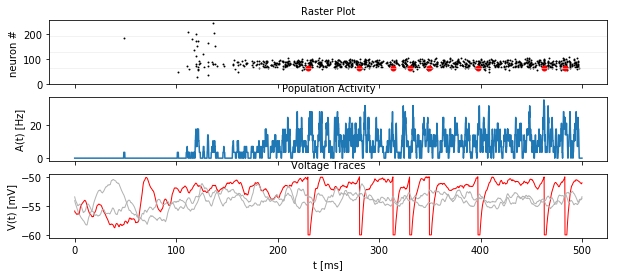

In [5]:


%matplotlib inline
from neurodynex.working_memory_network import wm_model
from neurodynex.tools import plot_tools
import brian2 as b2

wm_model.getting_started()


12.1.1 
By default, how many neurons are in the external poisson population?
Using the default parameters, what is the average number of spikes/second an excitatory neuron receives from the external population?

(N_excitatory=1024)
      (N_inhibitory=256)
      N_extern_poisson=1000
      poisson_firing_rate=1.4 
      
      <N_spike>=1.4*N_extern_poisson
      
      Which post-synaptic variable is targeted by a presynaptic (poisson) spike?
      
      S_AMPA is targeted: to open the Ampa channel
       Cm_excit = 0.5 * b2.nF  # membrane capacitance of excitatory neurons
    G_leak_excit = 25.0 * b2.nS  
    
    Tau= 1.8ms

(<matplotlib.figure.Figure at 0x11bfbfa50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1214939d0>)

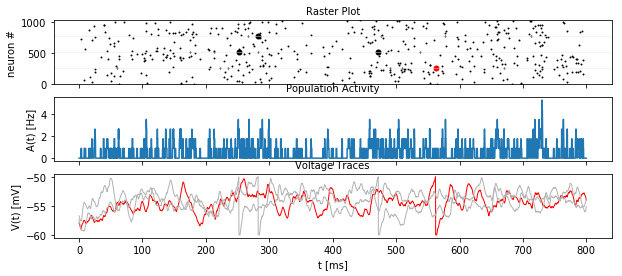

In [16]:
%matplotlib inline
import brian2 as b2
from neurodynex.working_memory_network import wm_model
from neurodynex.tools import plot_tools

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(sim_time=800. * b2.ms, poisson_firing_rate=1.3 * b2.Hz, sigma_weight_profile=20., Jpos_excit2excit=1.6)
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)


the activity ist almost constant

(<matplotlib.figure.Figure at 0x11fe4dfd0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11bf76f50>)

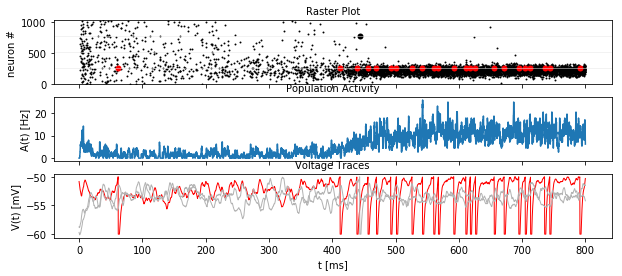

In [7]:
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(sim_time=800. * b2.ms, poisson_firing_rate=2.2 * b2.Hz, sigma_weight_profile=20., Jpos_excit2excit=1.6)
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)

(<matplotlib.figure.Figure at 0x11c09c150>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1220f75d0>)

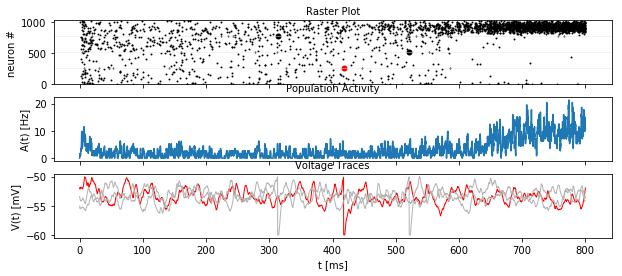

In [8]:
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(sim_time=800. * b2.ms, poisson_firing_rate=2.2 * b2.Hz, sigma_weight_profile=20., Jpos_excit2excit=1.6)
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)

a subpopulation of neuron start to fire at a high rate, the activity increase a lot. the subpopulation is targeted randomly.

INFO       width adjusted from 1. ms to 1.05 ms [brian2.monitors.ratemonitor.adjusted_width]


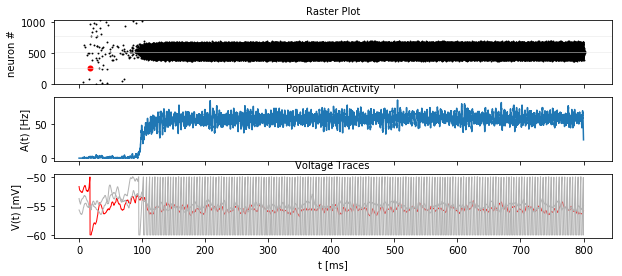

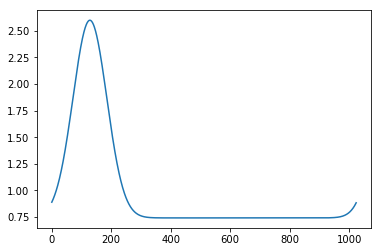

In [1]:
%matplotlib inline
import brian2 as b2
from neurodynex.working_memory_network import wm_model
from neurodynex.tools import plot_tools
import matplotlib.pyplot as plt

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, weight_profile_45 = wm_model.simulate_wm(sim_time=800. * b2.ms, poisson_firing_rate=1.3 * b2.Hz, sigma_weight_profile=20., Jpos_excit2excit=2.3)
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)

plt.figure()
plt.plot(weight_profile_45)

12.1.3 Jpos_excit2excit-> max of weight
sigma_weight_profile -> standard deviation of the distribution

### 12.2. Exercise: Network response to a structured input stimulus
At which time can you identify a change in the population activity? How does that compare to the time when the stimulus is applied?

What is the population activity at the end of the simulation?

For the time point t=400ms, sketch the firing rate across the population (neuron index on the x-axis, per-neuron firing rate on the y-axis).

Increase the stimulus strength to 0.5namp. What happens when the stimulus stops?

Increase the stimulus width to 60deg (stimulus_strength=0.1 * b2.namp, stimulus center = 120deg). How does the bump shape change?

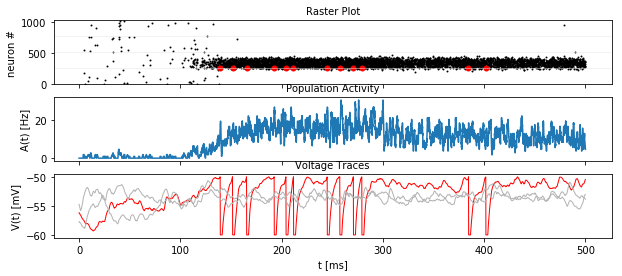

In [9]:
import brian2 as b2
from neurodynex.working_memory_network import wm_model
from neurodynex.tools import plot_tools
import matplotlib.pyplot as plt


rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(stimulus_center_deg=120, stimulus_width_deg=60, stimulus_strength=.1 * b2.namp, t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=500. * b2.ms)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
plt.show()
plt.figure()


The stimulus is applied at 100ms, we note a delayed change in the population activity after 100ms this is probably due to the tau_NMDA=65ms.

by increasing the stimulus, the Activity descrease when the stimulus stop it's like there ist an maximum activity

Increase the stimulus width to 60deg the bump become larger




We can remove the inhibitory population by setting its size to the minimal size N_inhibitory = 1. If we also deactivate the external input we can study the effect of the recurrent weights within the excitatory population:

Parameters: N_inhibitory = 1, stimulus_strength=0.65 * b2.namp, t_stimulus_start=5 * b2.ms, t_stimulus_duration=25 * b2.ms, sim_time=80. * b2.ms

Before running the simulation: What do you expect to see?
Run the simulation with the given parameters. Describe your observations.
Now run again a “normal” simulation:



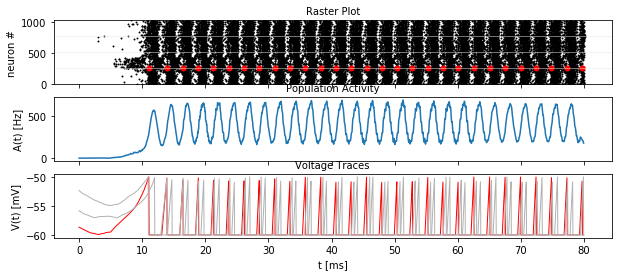

In [12]:
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(N_inhibitory=1,stimulus_center_deg=120, stimulus_width_deg=60, stimulus_strength=.65 * b2.namp, t_stimulus_start=5 * b2.ms, t_stimulus_duration=25 * b2.ms, sim_time=80. * b2.ms)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
plt.show()
plt.figure()

Without inhibitory input, the exitatory neurons activate the total population, it's lead to a maximal activity.

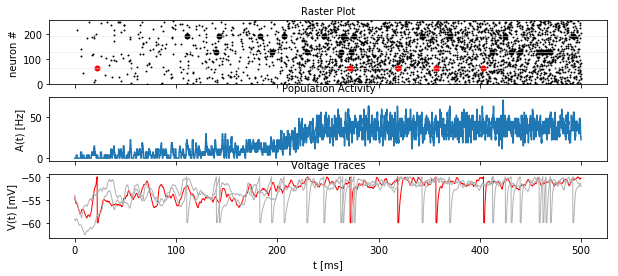

In [16]:
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.06 * b2.namp, t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=500. * b2.ms)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, t_min=0. * b2.ms)
plt.show()
plt.figure()

As for the excitatory population, plot the raster, population activity and voltage traces for the inhibitory population.
What is the role of the inhibitory population?

They are long range connection with the excitatory popultaion therfore the activity is the same for the total population.

## 12.3. Exercise: Decoding the population activity into a population vector
In the raster plot above we see that the population of spiking neurons keeps a memory of the stimulus. In this exercise we decode the population vector (i.e. the angle theta stored in the working memory) from the spiking activity. The population vector is defined as the weighted (by spike counts) mean of the preferred directions of the neurons. We access the data in the Brian2 SpikeMonitor returned by the simulation to calculate the population vector. Read the Brian2 documentation to see how one can access spike trains. Then implement the readout following the steps given here:

### 12.3.1. Mapping the neuron index onto its preferred direction
Write a function get_orientation(idx_list, N) which maps a vector of neuron indices idx_list onto a vector of preferred directions. idx_list is the subset of k monitored neurons. The second parameter N is the total number of neurons in the excitatory population. Verify your implementation by calling the function with the following example input:

In [23]:
def get_orientation(idx_list, N):
    dtheta=360./N
    return [dtheta*i +dtheta/2 for i in idx_list]
    

In [25]:
print get_orientation([0, 1, 5, 10], 11)
#[16.36, 49.09, 180.0, 343.64]

print get_orientation([0, 1, 499, 500, 999], 1000)
#[0.18, 0.54, 179.82, 180.18, 359.82]

[16.363636363636363, 49.09090909090909, 180.0, 343.6363636363636]
[0.18, 0.54, 179.82, 180.18, 359.82]


In [94]:
def get_spike_count(spike_monitor, spike_index_list, t_min, t_max):
    
    
    spike_count_list =np.zeros(len(spike_index_list))
    spike_trains = spike_monitor.spike_trains()
    for i in range(len(spike_index_list)):
        
        spike_count_list[i]=np.sum((spike_trains[i]>=t_min) & (spike_trains[i]<(t_max)))  # try sum(list of booleans)
        
    return spike_count_list
        
    

_exec_command_posix failed (status=2)



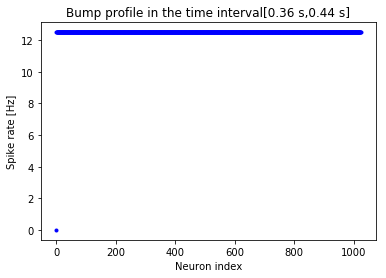

In [76]:
import matplotlib.pyplot as plt
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(stimulus_center_deg=120, stimulus_width_deg=60, stimulus_strength=.1 * b2.namp, t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=500. * b2.ms)
t = 400*b2.ms  # time point of interest
t_window = 80*b2.ms # width of the window over which the average is taken

t_min = t-t_window/2
t_max = t+t_window/2
spike_counts = get_spike_count(spike_monitor_excit, idx_monitored_neurons_excit, t_min, t_max)
spike_rates = spike_counts/(t_max-t_min)/b2.second
plt.plot(spike_rates, ".b")
plt.title("Bump profile in the time interval[{},{}]".format(t_min, t_max))
plt.xlabel("Neuron index")
plt.ylabel("Spike rate [Hz]")

### 2.3.3. Computing the population vector
Combine the two previous functions to calculate theta(t). For our purpose, it is sufficient to calculate a weighted mean of preferred directions. It is not necessary to correctly decode an angle close to 0deg = 360deg (You can stimulate the network at 350deg to see the problem).
Run a simulation and decode the population vector at the time when the stimulation ends. You should get a value close to the stimulus location.
Pack the calculation of theta(t) into a function get_theta_time_series which takes an additional parameter t_snapshots (an array of time points at which you want to decode the population vector). get_theta_time_series loops over all t_snapshots and calls get_spike_count. Use your function to readout and visualize the evolution of theta. You can take some inspiration from the following code fragment:

In [51]:
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(stimulus_center_deg=120, stimulus_width_deg=60, stimulus_strength=.1 * b2.namp, t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=500. * b2.ms)

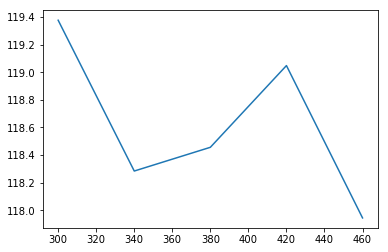

In [108]:

def get_theta_time_series(spike_monitor, idx_monitored_neurons, t_snapshots, t_window_width):
    thetas_ts=[]
    for t in t_snapshots:
        t_min=t-t_window_width/2
        t_max=t+t_window_width/2
        count_list_t=get_spike_count(spike_monitor, idx_monitored_neurons, t_min, t_max)
        mean_idx=(np.sum(count_list_t*np.copy(idx_monitored_neurons))/np.sum(count_list_t))
        thetas_ts.append(get_orientation([mean_idx], idx_monitored_neurons[-1]))
        
    return thetas_ts
t_stimulus_start=100 * b2.ms
t_stimulus_duration=200 * b2.ms      
t_sim=500. * b2.ms  
t_window_width=30*b2.ms
snapshot_interval=40*b2.ms
# Example how to create an array of timestamps spaced by snapshot_interval in the interval of interest.
t_snapshots = range(
    int(math.floor((t_stimulus_start+t_stimulus_duration)/b2.ms)),  # lower bound
    int(math.floor((t_sim-t_window_width/2)/b2.ms)),  # Subtract half window. Avoids an out-of-bound error later.
    int(round(snapshot_interval/b2.ms))  # spacing between time stamps
    )*b2.ms

# how your function get_theta_time_series could be called:
theta_ts = get_theta_time_series(spike_monitor_excit, idx_monitored_neurons_excit, t_snapshots, t_window_width)

# plot theta vs time using pyplot
import matplotlib.pyplot as plt
plt.plot(t_snapshots/b2.ms, theta_ts)

In [109]:
rate_monitor_excit, spike_monitor_excit1, voltage_monitor_excit, idx_monitored_neurons_excit1, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(N_excitatory = 2048,N_inhibitory=512,weight_scaling_factor=1.0,stimulus_center_deg=120, stimulus_width_deg=60, stimulus_strength=.1 * b2.namp, t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=1000. * b2.ms)
#rate_monitor_excit, spike_monitor_excit2, voltage_monitor_excit, idx_monitored_neurons_excit2, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(N_excitatory = 2048,N_inhibitory=512,weight_scaling_factor=2.0,stimulus_center_deg=120, stimulus_width_deg=60, stimulus_strength=.1 * b2.namp, t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=1000. * b2.ms)
#rate_monitor_excit, spike_monitor_excit3, voltage_monitor_excit, idx_monitored_neurons_excit3, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(N_excitatory = 2048,N_inhibitory=512,weight_scaling_factor=2.0,stimulus_center_deg=120, stimulus_width_deg=60, stimulus_strength=.1 * b2.namp, t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=1000. * b2.ms)



In [113]:
t_stimulus_start=100 * b2.ms
t_stimulus_duration=200 * b2.ms      
t_sim=1000. * b2.ms  
t_window_width=10*b2.ms
snapshot_interval=40*b2.ms
# Example how to create an array of timestamps spaced by snapshot_interval in the interval of interest.
t_snapshots = range(
    int(math.floor((t_stimulus_start+t_stimulus_duration)/b2.ms)),  # lower bound
    int(math.floor((t_sim-t_window_width/2)/b2.ms)),  # Subtract half window. Avoids an out-of-bound error later.
    int(round(snapshot_interval/b2.ms))  # spacing between time stamps
    )*b2.ms

# how your function get_theta_time_series could be called:
theta_ts1 = get_theta_time_series(spike_monitor_excit1, idx_monitored_neurons_excit1, t_snapshots, t_window_width)
theta_ts2 = get_theta_time_series(spike_monitor_excit2, idx_monitored_neurons_excit2, t_snapshots, t_window_width)
theta_ts3 = get_theta_time_series(spike_monitor_excit3, idx_monitored_neurons_excit3, t_snapshots, t_window_width)





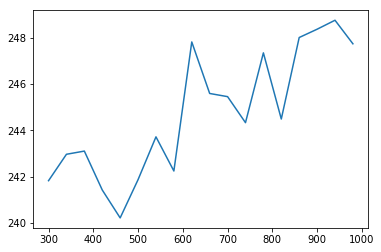

In [114]:
plt.plot(t_snapshots/b2.ms, theta_ts1)
#plt.plot(t_snapshots/b2.ms, theta_ts2)
#plt.plot(t_snapshots/b2.ms, theta_ts3)